# 외부 데이터 처리

1. 공공데이터나 오픈된 데이터를 파일로 다운 받아서 사용(csv, 엑셀, xml, json...)  
2. 웹 페이지를 읽어서 데이터 분석(그 웹 페이지 구조를 분석해야함)  

In [1]:
#pip install requests
import requests
html = requests.get('https://google.com').text  #웹 요청
html

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif" itemprop="image"><meta content="&#50672;&#47568; &#49828;&#54168;&#49500;" property="twitter:title"><meta content="#GoogleDoodle" property="twitter:description"><meta content="#GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-2xa.gif" property="og:image"><meta content="1100" property="og:image:width"><meta content="440" property="og:image:height"><meta content="https://www.google.com/logos/doodles/2020/

In [2]:
#pip install beautifulsoup4
from bs4 import BeautifulSoup

In [3]:
content = BeautifulSoup(html, 'html.parser')  #html소스를 돔 객체화 
title = content.html.head.title    #소스에서 title 태그 추출
print(title.string)  #string:태그의 텍스트 값 <태그>텍스트</태그>

Google


태그 접근 방법  
1. root.html.body.h1 : 태그 한개 검색  
2. root.find(태그[속성]): 태그 1개 검색  
3. root.find_all(태그[속성]): 태그 모두 검색  
4. root.select(태그): 태그 모두 검색

In [9]:
#link = content.html.body.a  #처음 a 태그 하나만 추출
links = content.find_all('a')
for i in links:
    print(i.get_text(), ':', i['href'])#속성값 읽기

이미지 : https://www.google.co.kr/imghp?hl=ko&tab=wi
지도 : https://maps.google.co.kr/maps?hl=ko&tab=wl
Play : https://play.google.com/?hl=ko&tab=w8
YouTube : https://www.youtube.com/?gl=KR&tab=w1
뉴스 : https://news.google.com/?tab=wn
Gmail : https://mail.google.com/mail/?tab=wm
드라이브 : https://drive.google.com/?tab=wo
더보기 » : https://www.google.co.kr/intl/ko/about/products?tab=wh
웹 기록 : http://www.google.co.kr/history/optout?hl=ko
설정 : /preferences?hl=ko
로그인 : https://accounts.google.com/ServiceLogin?hl=ko&passive=true&continue=https://www.google.com/&ec=GAZAAQ
 : /search?ie=UTF-8&q=%EC%97%B0%EB%A7%90+%EC%8A%A4%ED%8E%98%EC%85%9C&oi=ddle&ct=173710363&hl=ko&kgmid=ddl&sa=X&ved=0ahUKEwib2Zr1k_LtAhXHF4gKHXwbDVoQPQgD
고급검색 : /advanced_search?hl=ko&authuser=0
광고 프로그램 : /intl/ko/ads/
비즈니스 솔루션 : http://www.google.co.kr/intl/ko/services/
Google 정보 : /intl/ko/about.html
Google.co.kr : https://www.google.com/setprefdomain?prefdom=KR&prev=https://www.google.co.kr/&sig=K_KGaQubqJqLiOfPw3RpEvFK1BaQ0%3D
개인정보

In [15]:
html = '<html><body><p class=a>aaa</p><p class=b>bbb</p><p class=a>ccc</p><p class=a id=xxx>ddd</p></body></html>'
root = BeautifulSoup(html, 'html.parser') 
p1 = root.find_all('p')
print('p1:', p1)
p2 = root.find_all('p', {'class':'a'})
print('p2:', p2)
p3 = root.find_all('p', {'class':'b'})
print('p3:', p3)
p4 = root.find('p', {'class':'a'})
print('p4:', p4)
p5 = root.select('p')
print('p5:', p5)
p6 = root.select('p.a')#태그.클래스명 //태그#id명
print('p6:', p6)
p7 = root.select('p.b')
print('p7:', p7)
p8 = root.select('p#xxx')
print('p8:', p8)

p1: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p2: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p3: [<p class="b">bbb</p>]
p4: <p class="a">aaa</p>
p5: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p6: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p7: [<p class="b">bbb</p>]
p8: [<p class="a" id="xxx">ddd</p>]


In [29]:
html = requests.get('http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp').text  #웹 요청
#html=html.decode('utf-8')
#지역별 일간 날씨를 출력
root = BeautifulSoup(html, 'html.parser') 
loc = root.find_all('location')
for i in loc:
    print(i.city.get_text(), '지역 날씨========')
    d = i.find_all('data')
    for j in d:
        print(j.tmef.string , ':', j.wf.string)

서울 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 맑음
2021-01-04 00:00 : 맑음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 맑음
2021-01-05 12:00 : 맑음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
인천 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 맑음
2021-01-04 00:00 : 맑음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 맑음
2021-01-05 12:00 : 맑음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
수원 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 맑음
2021-01-04 00:00 : 맑음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 맑음
2021-01-05 12:00 : 맑음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
파주 지역 날씨========
2021-01-01 00:00 : 맑음
2021-01-01 12:00 : 맑음
2021-01-02 00:00 : 맑음
20

2021-01-04 00:00 : 구름많음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 구름많음
2021-01-05 12:00 : 구름많음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
울진 지역 날씨========
2021-01-01 00:00 : 구름많음
2021-01-01 12:00 : 구름많음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 구름많음
2021-01-04 00:00 : 구름많음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 구름많음
2021-01-05 12:00 : 구름많음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
울릉도 지역 날씨========
2021-01-01 00:00 : 구름많음
2021-01-01 12:00 : 구름많음
2021-01-02 00:00 : 맑음
2021-01-02 12:00 : 맑음
2021-01-03 00:00 : 맑음
2021-01-03 12:00 : 구름많음
2021-01-04 00:00 : 구름많음
2021-01-04 12:00 : 구름많음
2021-01-05 00:00 : 구름많음
2021-01-05 12:00 : 구름많음
2021-01-06 00:00 : 맑음
2021-01-07 00:00 : 맑음
2021-01-08 00:00 : 맑음
제주 지역 날씨========
2021-01-01 00:00 : 흐리고 비/눈
2021-01-01 12:00 : 구름많음
2021-01-02 00:00 : 구름많음
2021-01-02 12:00 : 구름많음
2021-01-03 00:00 : 구름많음
2021-01-03 12:00 : 구름많음
2021-01-04 00:00 : 구름많음
2021-01-04 12:0

In [34]:
import json
j = '[{"id":"aaa", "pwd":"111"},{"id":"bbb", "pwd":"222"}]'#json 데이터

items = json.loads(j)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print(item['id'], ':', item['pwd'])

aaa : 111
bbb : 222


In [37]:
html = requests.get('https://api.github.com/repositories').text
items = json.loads(html)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print('id:', item['id'], ' / ', 'name:', item['name'], ' / ', 'login:', item['owner']['login'])

id: 1  /  name: grit  /  login: mojombo
id: 26  /  name: merb-core  /  login: wycats
id: 27  /  name: rubinius  /  login: rubinius
id: 28  /  name: god  /  login: mojombo
id: 29  /  name: jsawesome  /  login: vanpelt
id: 31  /  name: jspec  /  login: wycats
id: 35  /  name: exception_logger  /  login: defunkt
id: 36  /  name: ambition  /  login: defunkt
id: 42  /  name: restful-authentication  /  login: technoweenie
id: 43  /  name: attachment_fu  /  login: technoweenie
id: 48  /  name: microsis  /  login: caged
id: 52  /  name: s3  /  login: anotherjesse
id: 53  /  name: taboo  /  login: anotherjesse
id: 54  /  name: foxtracs  /  login: anotherjesse
id: 56  /  name: fotomatic  /  login: anotherjesse
id: 61  /  name: glowstick  /  login: mojombo
id: 63  /  name: starling  /  login: defunkt
id: 65  /  name: merb-more  /  login: wycats
id: 68  /  name: thin  /  login: macournoyer
id: 71  /  name: resource_controller  /  login: jamesgolick
id: 73  /  name: markaby  /  login: jamesgolick
i

In [8]:
#pip install lxml
import pandas as pd

def get_code(name):
    a = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', index_col='회사명')[0]
    code = a.loc[name, '종목코드']
    code = '{:0=6d}'.format(code)
    return code
                

In [12]:
def get_stock_info(code):
    url = 'https://finance.naver.com/item/sise_day.nhn?code='+code
    a = pd.read_html(url)[0]
    a = a.dropna()#NAN 줄 제거
    return a

In [13]:
info = get_stock_info(get_code('삼성전자'))
info

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.12.29,78300.0,400.0,78800.0,78900.0,77300.0,30176643.0
2,2020.12.28,78700.0,900.0,79000.0,80100.0,78200.0,40085044.0
3,2020.12.24,77800.0,3900.0,74100.0,78800.0,74000.0,32502870.0
4,2020.12.23,73900.0,1600.0,72400.0,74000.0,72300.0,19411326.0
5,2020.12.22,72300.0,700.0,72500.0,73200.0,72100.0,16304910.0
9,2020.12.21,73000.0,0.0,73100.0,73400.0,72000.0,20367355.0
10,2020.12.18,73000.0,300.0,73300.0,73700.0,73000.0,17613029.0
11,2020.12.17,73300.0,500.0,73400.0,73700.0,72600.0,24293214.0
12,2020.12.16,73800.0,0.0,74100.0,74500.0,73400.0,17512081.0
13,2020.12.15,73800.0,0.0,73800.0,74100.0,73300.0,20863671.0


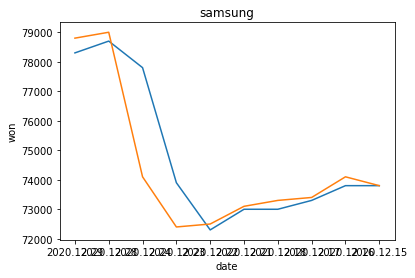

In [16]:
import matplotlib.pyplot as plt

plt.plot(info['날짜'], info['종가'])
plt.plot(info['날짜'], info['시가'])
plt.title('samsung')
plt.xlabel('date')
plt.ylabel('won')
plt.show()
